# Power BI semantic model validation with Great Expectations
Created by Will Needham, [Learn Microsoft Fabric](https://youtube.com/@learnmicrosoftfabric) 

**Goal: show you a simple way to setup Great Expectations to perform validation of a Power BI semantic model.** 

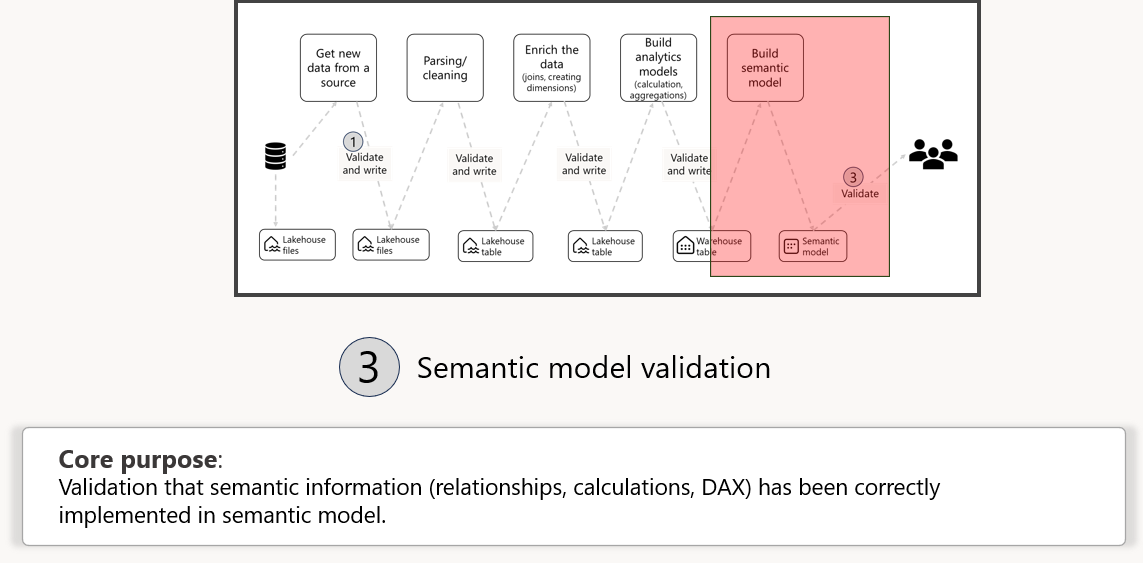

_Note: the approach shown in this notebook is what I would call 'GX Lite'. GX is a vast library with lots of different features, but it can be overwhelming for beginners. I have developed the approach below to strip out a lot of the complexity and make it as easy as possible to get started with GX. Once you get the basics, it would be worthwhile learning about getting up Data Sources, Expectation Suites, Checkpoints etc, as these unlock more of the GX advanced features, like Actions, Data Docs etc._

If you're looking for another perspective (and a more complete look at semantic model validation using GX in Fabric), I recommend this [Microsoft blog post](https://blog.fabric.microsoft.com/en-us/blog/semantic-link-data-validation-using-great-expectations/) and the [associated notebook](https://github.com/microsoft/fabric-samples/blob/main/docs-samples/data-science/semantic-link-samples/great_expectations_tutorial.ipynb). 


In the example, we are validating Power BI semantic model objects. The idea is to validate measures and relationships defined in your semantic model.

## Prerequisites
This notebook assumes you have run the first two notebooks, and created a semantic model in your workspace, called 'MySemanticModel'. 



## Install GX & Semantic Link (if not installed at the workspace level)

In [ ]:
%pip install --q great_expectations semantic-link


## Validating table data in a semantic model 

In [ ]:
import great_expectations as gx
import sempy.fabric as fabric

semantic_table = fabric.read_table(dataset='MySemanticModel',table='validated_customers')
validator = gx.from_pandas(semantic_table)
validator.expect_column_to_exist('SubscriptionDate')
validation_results = validator.validate()
validation_results.success


## Validating measure outputs in a semantic model

In [ ]:
measure_results = fabric.evaluate_measure(dataset='MySemanticModel',measure='Number of Customers')
validator = gx.from_pandas(measure_results)
validator.expect_column_values_to_be_in_set('Number of Customers', [100])
validation_results = validator.validate()
validation_results.success


## Validating DAX query outputs in a semantic model

In [ ]:
dax_query = '''EVALUATE SUMMARIZECOLUMNS(
        'validated_customers'[Country],
        "Number of Customers",
        CALCULATE([Number of Customers]))
'''

dax_results = fabric.evaluate_dax('MySemanticModel',dax_query)
dax_results.head(30)
validator = gx.from_pandas(dax_results)
validator.expect_column_values_to_be_between('[Number of Customers]',min_value=1, max_value=6)
validation_results = validator.validate()
validation_results.success